In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', sep=',', index_col='id')

In [3]:
rating_stats_by_year = dict()
subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',
            'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
years = [13, 14, 15, 16, 17]
df_for_each_course = [
    df[['year', 'calculus', 'algebra', 'discrete']],
    df[['year', 'ode', 'mechanics', 'complex']],
    df[['year', 'prob_and_stat', 'pde', 'functional']],
    df[['year', 'optimization', 'random_proc', 'numerical']]
]
i = 1

for course in df_for_each_course:
    rating_stats_by_year[i] = {}

    for year in years:      
        current_course_df = course[course['year'] == year].drop(columns=['year'])
        current_course_df = current_course_df.apply(lambda x: x.value_counts())
        current_course_df = current_course_df.sum(axis=1)
        
        if not current_course_df.empty:
            current_course_df.index.astype(int)
            rating_stats_by_year[i][year+1] = current_course_df

    i += 1

#### Динамика успеваемости по первому курсу


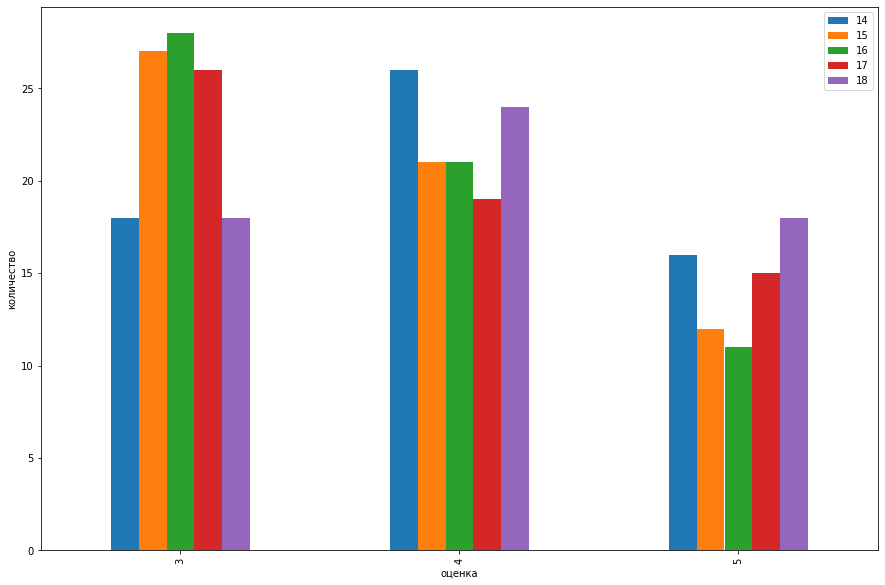

In [26]:
ax = pd.DataFrame(rating_stats_by_year[1]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');


#### Динамика успеваемости по второму курсу


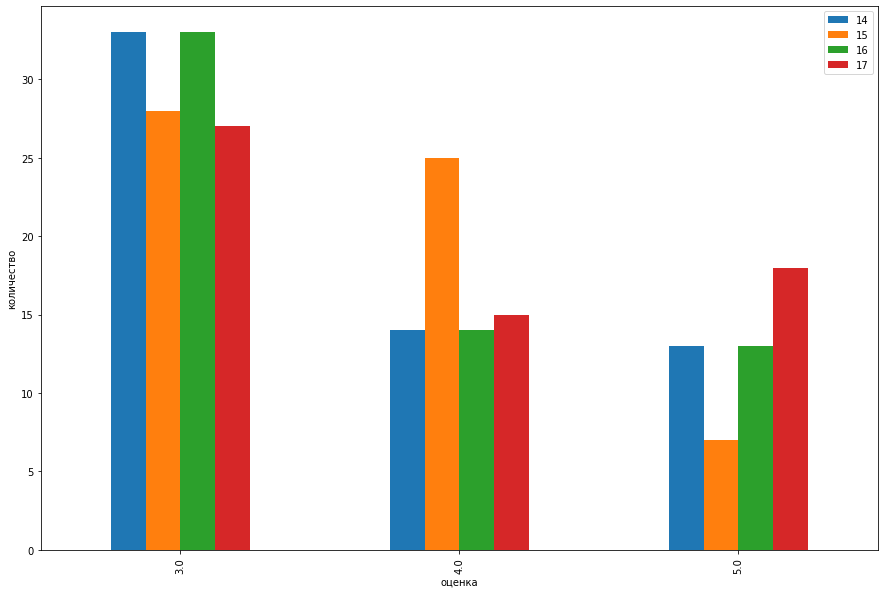

In [27]:
ax = pd.DataFrame(rating_stats_by_year[2]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');


#### Динамика успеваемости по третьему курсу


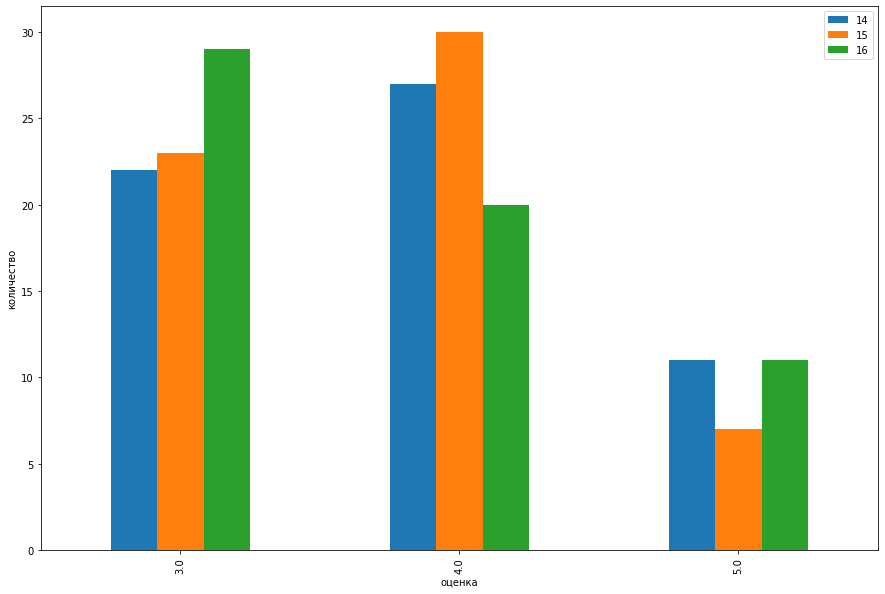

In [28]:
ax = pd.DataFrame(rating_stats_by_year[3]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');


#### Динамика успеваемости по четвертому курсу


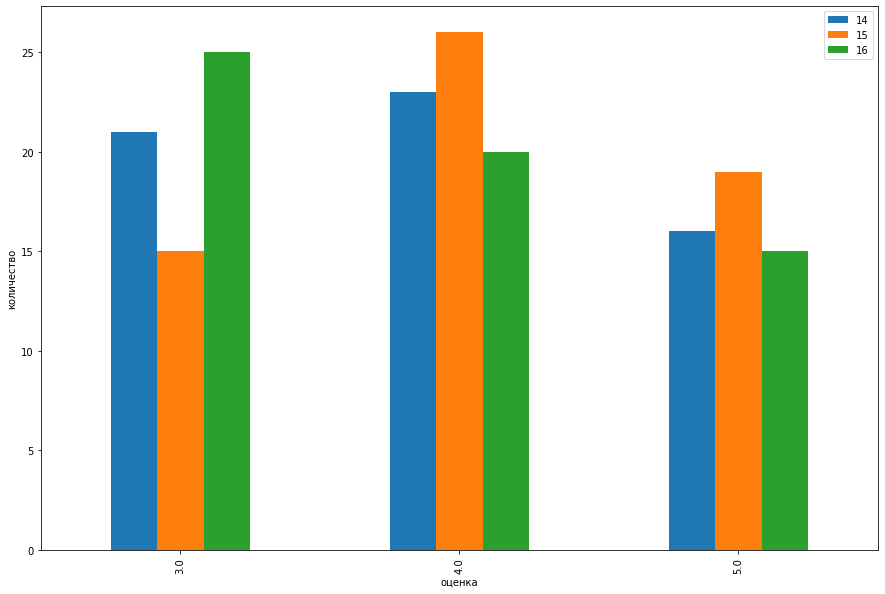

In [29]:
ax = pd.DataFrame(rating_stats_by_year[4]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');

#### Динамика баллов егэ

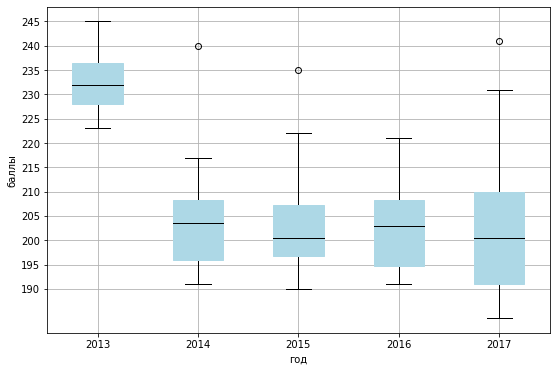

In [7]:
ege_df = df[['year', 'ege']]
ege_df_by_year = dict()

for year in years:
    year_df = ege_df[ege_df['year'] == year].drop(columns=['year'])
    ege_df_by_year["20{}".format(year)] = year_df['ege'].tolist()

box_props = dict(boxes='lightblue', whiskers="black", medians="black", caps="black")
ege_df = pd.DataFrame.from_dict(ege_df_by_year)
ax = ege_df.plot.box(figsize=(9,6), color=box_props, patch_artist=True)
ax.set_ylabel('баллы')
ax.set_xlabel('год')
ax.grid()
ax.set_yticks(np.arange(190, 250, 5))
plt.savefig('ege.png', dpi=300)

#### Корреляция баллов ЕГЭ и средней оценки


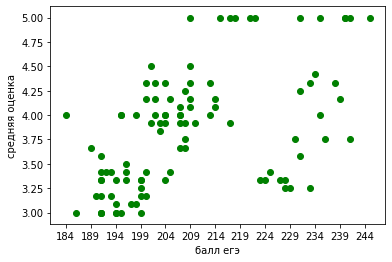

In [8]:
df['mean'] = df[subjects].mean(axis=1)
mean_rating = df['mean'].tolist()
ege = df['ege'].tolist()

plt.scatter(ege, mean_rating, c='green')
# plt.title("Корреляция баллов ЕГЭ и средней оценки %.4f" % df.corr()['mean']['ege'])

plt.ylabel('средняя оценка')
plt.xlabel('балл егэ')
plt.xticks(np.arange(min(ege), max(ege)+1, 5))
plt.savefig('correlation.png', dpi=300);

#### Средний балл по каждому потоку


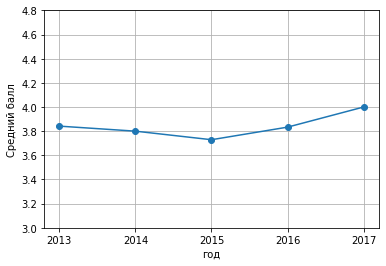

In [9]:
mean_rating_by_flow = {}

for year in years:
    mean_rating_by_flow[int("20{}".format(year))] = (df[df['year'] == year][['mean']].sum() / 20).values[0]

x = mean_rating_by_flow.keys()
y = mean_rating_by_flow.values()
plt.errorbar(x, y, marker='o')

plt.ylabel('Средний балл')
plt.xlabel('год')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(3, 5, 0.2))
plt.grid()
plt.savefig('mean_by_flow.png', dpi=300);


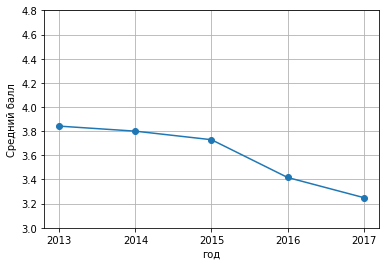

In [7]:
prediction_df = pd.read_csv('data_prediction.csv', sep=',', index_col='id')
prediction_df['mean'] = prediction_df[subjects].mean(axis=1)
mean_rating_by_flow = {}

for year in years:
    mean_rating_by_flow[int("20{}".format(year))] = (prediction_df[prediction_df['year'] == year][['mean']].sum() / 20).values[0]

x = mean_rating_by_flow.keys()
y = mean_rating_by_flow.values()
plt.errorbar(x, y, marker='o')

plt.ylabel('Средний балл')
plt.xlabel('год')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(3, 5, 0.2))
plt.grid()
plt.savefig('mean_by_flow_prediction.png', dpi=300);

#### Корреляция баллов ЕГЭ и средней оценки без 2013 года


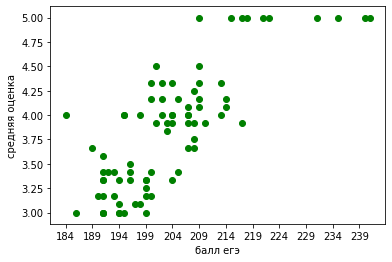

In [8]:
tmp_df = df[df['year'] != 13].copy()
tmp_df['mean'] = tmp_df[subjects].mean(axis=1)
mean_rating = tmp_df['mean'].tolist()
ege = tmp_df['ege'].tolist()

plt.scatter(ege, mean_rating, c='green')
# plt.title("Корреляция баллов ЕГЭ и средней оценки %.4f" % tmp_df.corr()['mean']['ege'])

plt.ylabel('средняя оценка')
plt.xlabel('балл егэ')
plt.xticks(np.arange(min(ege), max(ege)+1, 5))
plt.savefig('correlation_without_2013.png', dpi=300);

#### Гистограмма баллов егэ


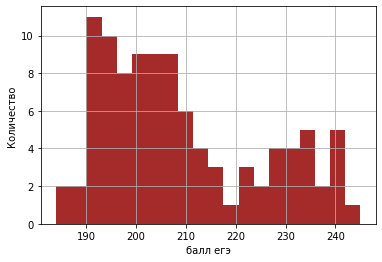

In [9]:
df['ege'].hist(color='brown', bins=20)
# df['ege'].plot.kde()
plt.ylabel('Количество')
plt.xlabel('балл егэ')
plt.savefig('hist_ege.png', dpi=300);

#### Параметрические характеристики выборки баллов ЕГЭ


In [10]:
df['ege'].describe()

count    100.000000
mean     209.190000
std       15.750386
min      184.000000
25%      196.750000
50%      205.000000
75%      221.250000
max      245.000000
Name: ege, dtype: float64

#### Гистограмма средней оценки


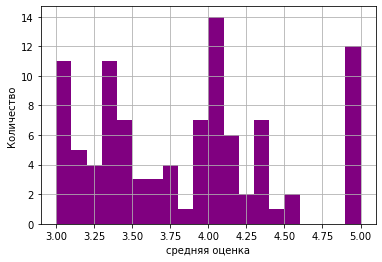

In [11]:
df['mean'].hist(color='purple', bins=20)
# df['mean'].plot.kde()
plt.ylabel('Количество')
plt.xlabel('средняя оценка')
plt.savefig('hist_mean.png', dpi=300);

#### Параметрические характеристики выборки средней оценки


In [11]:
df['mean'].describe()


count    100.000000
mean       3.840833
std        0.603034
min        3.000000
25%        3.333333
50%        3.916667
75%        4.166667
max        5.000000
Name: mean, dtype: float64

#### Корреляция Спирмена для баллов ЕГЭ и средней оценки


In [13]:
df['mean_rank'] = df['mean'].rank(ascending=False)
df['ege_rank'] = df['ege'].rank(ascending=False)
# df.corr(method='spearman')['mean']['ege']

# df.corr(method='spearman')['mean_rank']['ege_rank']
df.corr(method='spearman')['mean_rank']['ege_rank']


0.5678659633707841

#### Корреляция Спирмена для баллов ЕГЭ и средней оценки без наблюдений 2013 года


In [14]:
df_without_2013 = df[df['year'] != 13].copy()
df_without_2013['mean_rank'] = df_without_2013['mean'].rank(ascending=False)
df_without_2013['ege_rank'] = df_without_2013['ege'].rank(ascending=False)
# df.corr(method='spearman')['mean']['ege']

# df_without_2013.corr(method='spearman')['mean_rank']['ege_rank']
df_without_2013.corr(method='spearman')['mean_rank']['ege_rank']

0.7603385021989282

#### Гипотеза о взаимосвязи успеваемости по мат. анализу, оду и дусчп


In [16]:
df['calculus'].rank(ascending=False)

id
1      15.0
2      15.0
3      45.5
4      15.0
5      45.5
6      45.5
7      15.0
8      15.0
9      45.5
10     81.0
11     81.0
12     45.5
13     81.0
14     81.0
15     45.5
16     81.0
17     81.0
18     81.0
19     81.0
20     45.5
21     15.0
22     15.0
23     15.0
24     45.5
25     15.0
26     15.0
27     81.0
28     45.5
29     45.5
30     45.5
       ... 
71     45.5
72     45.5
73     81.0
74     81.0
75     81.0
76     81.0
77     81.0
78     81.0
79     81.0
80     81.0
81     15.0
82     15.0
83     15.0
84     15.0
85     15.0
86     15.0
87     15.0
88     45.5
89     45.5
90     15.0
91     81.0
92     45.5
93     81.0
94     81.0
95     45.5
96     81.0
97     81.0
98     45.5
99     81.0
100    45.5
Name: calculus, Length: 100, dtype: float64

#### Корреляция баллов ЕГЭ и средней оценки c смещенным 2013 годом


In [10]:
tmp_df = df.copy()
tmp_df = tmp_df[tmp_df['year'] == 13]['ege'].apply(lambda x: x - 30)
tmp_df['mean'] = tmp_df[subjects].mean(axis=1)
mean_rating = tmp_df['mean'].tolist()
ege = tmp_df['ege'].tolist()

plt.scatter(ege, mean_rating, c='green')

KeyError: "None of [Index(['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',\n       'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc',\n       'numerical'],\n      dtype='object', name='id')] are in the [index]"